In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction


In [2]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/content/eng_viet_test.csv")

# Lấy dữ liệu tiếng Anh và tiếng Việt
eng_data = [text.lower() for text in data["eng"]]
viet_data = [text.lower() for text in data["viet"]]

In [ ]:
# Khởi tạo tokenizer và model từ transformers
tokenizer_en2vi = AutoTokenizer.from_pretrained("vinai/vinai-translate-en2vi-v2", src_lang="en_XX")
model_en2vi = AutoModelForSeq2SeqLM.from_pretrained("vinai/vinai-translate-en2vi-v2")

# Hàm dịch văn bản
def translate_en2vi(en_text: str) -> str:
    input_ids = tokenizer_en2vi(en_text, return_tensors="pt").input_ids
    output_ids = model_en2vi.generate(
        input_ids,
        decoder_start_token_id=tokenizer_en2vi.lang_code_to_id["vi_VN"],
        num_return_sequences=1,
        num_beams=5,
        early_stopping=True
    )
    vi_text = tokenizer_en2vi.batch_decode(output_ids, skip_special_tokens=True)
    return vi_text[0]

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/content/eng_viet_test.csv")

# Lấy dữ liệu tiếng Anh và tiếng Việt
eng_data = [text.lower() for text in data["eng"]]
viet_data = [text.lower() for text in data["viet"]]

# Dịch dữ liệu
viet_pred_data = [translate_en2vi(eng_text) for eng_text in eng_data]
print(viet_pred_data)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
# pip install pickle5

In [3]:
import pickle
with open('/content/viet_pred_data.pkl', 'rb') as f:
    viet_pred_data = pickle.load(f)

In [4]:

print(viet_pred_data)

['tôi chỉ có thể tự hỏi nếu điều này là như nhau cho tất cả mọi người khác.', 'Nếu thế giới không như bây giờ, tôi có thể tin tưởng bất cứ ai.', 'nước mỹ là một nơi đáng yêu để được, nếu bạn đang ở đây để kiếm tiền.', 'Tôi có thể phản xã hội, nhưng không có nghĩa là tôi không nói chuyện với mọi người.', 'tôi là một người thiếu sót, nhưng đây là những sai sót có thể dễ dàng được sửa chữa.', 'Tôi nghĩ rằng cuộc sống của tôi với bạn đã ảnh hưởng đến cách sống của bạn.', 'tôi không thích khi các nhà toán học biết nhiều hơn tôi không thể thể hiện bản thân một cách rõ ràng.', 'tôi không biết làm thế nào để chứng minh nó, vì nó quá rõ ràng!', 'Tôi đã tìm ra một giải pháp, nhưng tôi tìm ra nó quá nhanh đến nỗi nó không thể là giải pháp đúng.', '"Khi nào bạn sẽ trở lại?" "Tất cả phụ thuộc vào thời tiết."', 'chúng tôi đã không giúp anh ta, vì vậy anh ta đã tự mình làm được.', 'Một cuốn sách mỏng và cuốn kia dày; cuốn dày có khoảng 200 trang.', 'Bạn tôi ở trường đại học tặng tôi một chiếc kindle 

In [5]:
# Tính toán điểm BLEU
smoothing_function = SmoothingFunction().method4
bleu_score1 = corpus_bleu([[text.split()] for text in viet_data], [text.split() for text in viet_pred_data], smoothing_function=smoothing_function)

# In ra một số phần tử đầu tiên của danh sách
for i in range(5):  # In ra 5 phần tử đầu tiên
    print(f"Reference: {viet_data[i]}")
    print(f"Predicted: {viet_pred_data[i]}")

# In ra điểm BLEU
print("Điểm BLEU:", bleu_score1)

Reference: tôi chỉ có thể tự hỏi liệu điều này có giống với những người khác không.
Predicted: tôi chỉ có thể tự hỏi nếu điều này là như nhau cho tất cả mọi người khác.
Reference: nếu thế giới không như bây giờ, tôi có thể tin bất cứ ai.
Predicted: Nếu thế giới không như bây giờ, tôi có thể tin tưởng bất cứ ai.
Reference: nước mỹ là nơi tuyệt vời để sinh sống nếu bạn đến đây để kiếm tiền.
Predicted: nước mỹ là một nơi đáng yêu để được, nếu bạn đang ở đây để kiếm tiền.
Reference: tôi có thể chống đối xã hội, nhưng điều đó không có nghĩa là tôi không nói chuyện với mọi người.
Predicted: Tôi có thể phản xã hội, nhưng không có nghĩa là tôi không nói chuyện với mọi người.
Reference: tôi là một người có nhiều khuyết điểm, nhưng đây là những khuyết điểm có thể dễ dàng sửa chữa.
Predicted: tôi là một người thiếu sót, nhưng đây là những sai sót có thể dễ dàng được sửa chữa.
Điểm BLEU: 0.5494895625698989


In [6]:
train_df = pd.read_csv('/content/eng_viet_train_final.csv')
test_df = pd.read_csv('/content/eng_viet_train_final.csv')
vi_input = train_df['viet']
en_input = train_df['eng']

In [7]:
start = "<start>"
end = "<end>"

In [8]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00


In [9]:
from pyvi import ViTokenizer
vi_input_tokenize = [ViTokenizer.tokenize(i).split() for i in vi_input]
for i in range(len(vi_input_tokenize)):
  vi_input_tokenize[i].insert(0, start)
  vi_input_tokenize[i].insert(len(vi_input_tokenize[i]), end)

In [10]:
import spacy

# Load English model
nlp_en = spacy.load("en_core_web_sm")
# Tokenize English sentences
en_input_tokenize = [[] for _ in range(len(en_input))]  # Khởi tạo danh sách để chứa các token của từng câu.
for i in range(len(en_input)):
    doc = nlp_en(en_input[i])  # Phân tích câu tiếng Anh sử dụng mô hình SpaCy.
    for token in doc:
        en_input_tokenize[i].append(str(token))  # Thêm từng token vào danh sách.
    en_input_tokenize[i].insert(0, start)  # Chèn token bắt đầu vào đầu mỗi câu.
    en_input_tokenize[i].insert(len(en_input_tokenize[i]), end)  # Chèn token kết thúc vào cuối mỗi câu.


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

vi_tokenizer = Tokenizer()
vi_tokenizer.fit_on_texts(vi_input_tokenize)
vi_vocabulary = vi_tokenizer.word_index
vi_size = len(vi_vocabulary)
print(vi_vocabulary)
print(vi_size)


en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(en_input_tokenize)
en_vocabulary = en_tokenizer.word_index
en_size = len(en_vocabulary)
print(en_vocabulary)
print(en_size) # number of words in the vocabulary

{'<start>': 1, '<end>': 2, '.': 3, 'tôi': 4, 'không': 5, 'tom': 6, 'bạn': 7, '?': 8, 'ấy': 9, 'có': 10, 'đã': 11, 'là': 12, 'anh': 13, 'một': 14, 'của': 15, 'đó': 16, ',': 17, 'sẽ': 18, 'làm': 19, 'nói': 20, 'điều': 21, 'ở': 22, 'phải': 23, 'cô': 24, 'đang': 25, 'biết': 26, 'được': 27, 'người': 28, 'gì': 29, 'rằng': 30, 'đi': 31, 'với': 32, 'và': 33, 'đến': 34, 'mary': 35, 'này': 36, 'cho': 37, 'có_thể': 38, 'muốn': 39, 'nghĩ': 40, 'họ': 41, 'chúng_tôi': 42, 'những': 43, 'khi': 44, 'vào': 45, 'trong': 46, '"': 47, 'rất': 48, 'để': 49, 'đây': 50, 'về': 51, 'thích': 52, 'nhiều': 53, 'nhà': 54, 'hơn': 55, 'bị': 56, 'mình': 57, 'nên': 58, 'tiếng': 59, 'lại': 60, 'ra': 61, '\u200b': 62, 'nó': 63, 'chúng_ta': 64, 'không_thể': 65, 'ai': 66, 'ăn': 67, 'nếu': 68, 'hãy': 69, 'con': 70, 'cần': 71, 'chưa': 72, 'chiếc': 73, 'còn': 74, 'học': 75, 'mọi': 76, 'nhưng': 77, 'như': 78, 'trên': 79, 'nữa': 80, 'thấy': 81, 'từ': 82, 'vì': 83, 'ngày': 84, 'trước': 85, 'năm': 86, 'đều': 87, 'vẫn': 88, 'rồi': 

In [12]:
en_vocabulary_reverse = {}
for key, value in en_tokenizer.word_index.items():
  en_vocabulary_reverse[value] = key
en_vocabulary_reverse[0] = ''

vi_vocabulary_reverse = {}
for key, value in vi_tokenizer.word_index.items():
  vi_vocabulary_reverse[value] = key
vi_vocabulary_reverse[0] = ''

print(en_vocabulary_reverse)
print(vi_vocabulary_reverse)

{1: '<start>', 2: '<end>', 3: '.', 4: 'i', 5: 'the', 6: 'to', 7: 'tom', 8: 'you', 9: 'is', 10: "n't", 11: 'a', 12: 'that', 13: '?', 14: ',', 15: 'do', 16: "'s", 17: 'in', 18: 'he', 19: 'it', 20: 'of', 21: 'was', 22: 'and', 23: 'have', 24: 'my', 25: 'mary', 26: 'are', 27: 'me', 28: 'this', 29: 'we', 30: 'what', 31: 'she', 32: 'for', 33: '"', 34: 'did', 35: 'on', 36: 'be', 37: 'know', 38: 'like', 39: 'not', 40: 'with', 41: "'m", 42: 'think', 43: 'they', 44: 'at', 45: 'his', 46: 'your', 47: 'can', 48: 'go', 49: 'want', 50: 'there', 51: 'has', 52: 'said', 53: 'her', 54: 'does', 55: 'if', 56: 'will', 57: 'about', 58: 'how', 59: 'as', 60: 'would', 61: "'re", 62: 'one', 63: 'had', 64: 'going', 65: 'him', 66: 'but', 67: 'very', 68: 'should', 69: 'time', 70: "'ll", 71: 'from', 72: 'by', 73: 'could', 74: "'ve", 75: 'here', 76: 'when', 77: 'were', 78: 'no', 79: 'so', 80: 'all', 81: 'why', 82: 'get', 83: 'ca', 84: 'an', 85: 'up', 86: 'who', 87: 'more', 88: 'good', 89: 'really', 90: 'told', 91: 'be

In [13]:


en_sequence = en_tokenizer.texts_to_sequences(en_input_tokenize)
enmaxlen = max([len(i) for i in en_sequence])
en_sequence = pad_sequences(en_sequence, maxlen = enmaxlen, padding = 'post')
print(en_sequence[0])

vi_sequence = vi_tokenizer.texts_to_sequences(vi_input_tokenize)
vimaxlen = max([len(i) for i in vi_sequence])
vi_sequence = pad_sequences(vi_sequence, maxlen = vimaxlen, padding = 'post')
print(vi_sequence[0])


[  1  60  19  36 353  55   4 391  46 311 134 203  13   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  1   4  34 512  15   7  45 952  10  27   5   8   2   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [14]:
split_ratio = 0.9
split = round(len(vi_sequence)* split_ratio)
trainX = en_sequence[:split]
testX = en_sequence[split:]
trainY = vi_sequence[:split]
testY = vi_sequence[split:]

train_samples = len(trainX)
val_samples = len(testX)
batch_size = 16
epochs = 200
latent_dim=128


In [15]:
def generate_batch(X, y, batch_size):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_input_data = []
      decoder_input_data = []
      decoder_target_data = []
      for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
        encoder_input_data.append(input_text)
        decoder_input_data.append(target_text)
        decodertargetdata = to_categorical(target_text, num_classes=vi_size+1)[1:]
        decoder_target_data.append(np.concatenate((np.array(decodertargetdata), np.zeros((1, vi_size+1))), axis = 0))
      encoder_input_data = np.array(encoder_input_data)
      decoder_input_data = np.array(decoder_input_data)
      decoder_target_data = np.array(decoder_target_data)
      yield([encoder_input_data, decoder_input_data], decoder_target_data)


In [16]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(en_size+1, latent_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]


In [17]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vi_size+1, latent_dim, mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vi_size+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [18]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [19]:
model.fit(generate_batch(trainX, trainY, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(testX, testY, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/200
326/326 [==============================] - 45s 107ms/step - loss: 5.0969 - acc: 0.1729 - val_loss: 4.6768 - val_acc: 0.3037
Epoch 2/200
326/326 [==============================] - 19s 59ms/step - loss: 4.4478 - acc: 0.2862 - val_loss: 4.4536 - val_acc: 0.3156
Epoch 3/200
326/326 [==============================] - 20s 60ms/step - loss: 4.2841 - acc: 0.3021 - val_loss: 4.3199 - val_acc: 0.3314
Epoch 4/200
326/326 [==============================] - 19s 58ms/step - loss: 4.1512 - acc: 0.3173 - val_loss: 4.2218 - val_acc: 0.3365
Epoch 5/200
326/326 [==============================] - 19s 59ms/step - loss: 4.0434 - acc: 0.3267 - val_loss: 4.1338 - val_acc: 0.3386
Epoch 6/200
326/326 [==============================] - 23s 69ms/step - loss: 3.9484 - acc: 0.3382 - val_loss: 4.0488 - val_acc: 0.3528
Epoch 7/200
326/326 [==============================] - 22s 68ms/step - loss: 3.8568 - acc: 0.3470 - val_loss: 3.9740 - val_acc: 0.3603
Epoch 8/200
326/326 [==============================] -

In [20]:
import pickle

# Lưu cấu trúc mô hình
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

# Lưu trọng số mô hình
model.save_weights("model_weights1.h5")

# Lưu toàn bộ mô hình (optional)
with open('model_pickle1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# from tensorflow.keras.models import model_from_json

# # Tải lại cấu trúc mô hình
# with open('model1.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# model = model_from_json(loaded_model_json)

# # Tải lại trọng số mô hình
# model.load_weights("model_weights1.h5")

# # Tải lại toàn bộ mô hình (optional)
# with open('model_pickle1.pkl', 'rb') as file:
#     model = pickle.load(file)


In [21]:
# Encode the input sequence to get the "Context vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_state_input)
decoder_states2 = [state_h2, state_c2]

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_state_input,
    [decoder_outputs2] + decoder_states2)


In [ ]:
# def decode_sequence(input_seq):
#     # Encode the input as state vectors.
#     states_value = encoder_model.predict(input_seq)
#     # Generate empty target sequence of length 1.
#     target_seq = np.zeros((1,1))
#     # Populate the first character of target sequence with the start character.
#     target_seq[0, 0] = vi_vocabulary['<start>']

#     # Sampling loop for a batch of sequences (to simplify, here we assume a batch of size 1).
#     stop_condition = False
#     decoded_sentence = ' '

#     # greedy search
#     while not stop_condition:
#         output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
#         # print(output_tokens)
#         # Sample a token
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         # print(sampled_token_index)
#         sampled_word =vi_vocabulary_reverse[sampled_token_index]
#         decoded_sentence += ' '+ sampled_word

#         # Exit condition: either hit max length or find stop character.
#         if (sampled_word == '<end>' or
#            len(decoded_sentence) > 100):
#             stop_condition = True
#         # Update the target sequence (of length 1).
#         target_seq = np.zeros((1,1))
#         target_seq[0, 0] = sampled_token_index
#         # Update states
#         states_value = [h, c]
#     return decoded_sentence

In [22]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = vi_vocabulary['<start>']

    # Sampling loop for a batch of sequences (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''

    # greedy search
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = vi_vocabulary_reverse[sampled_token_index]
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find stop character.
        if (sampled_word == '<end>' or len(decoded_sentence) > 100):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence.strip('<end>').strip()


In [24]:
# Tokenize and pad the test English sentences
test_en_input = test_df['eng']
test_en_input_tokenize = [[] for _ in range(len(test_en_input))]
for i in range(len(test_en_input)):
    doc = nlp_en(test_en_input[i])
    for token in doc:
        test_en_input_tokenize[i].append(str(token))

test_en_sequence = en_tokenizer.texts_to_sequences(test_en_input_tokenize)
test_en_sequence = pad_sequences(test_en_sequence, maxlen=enmaxlen, padding='post')


In [25]:
# Translate and decode each test sentence
predictions = []
for seq in test_en_sequence:
    seq = np.reshape(seq, (1, -1))  # Reshape to match the expected input shape
    decoded_sentence = decode_sequence(seq)
    predictions.append(decoded_sentence)



Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 33ms/step


In [26]:
import pickle
with open('predictions1.pkl', 'wb') as f:
    pickle.dump((predictions), f)

In [ ]:
# import pickle
# with open('/content/model_pickle1.pkl', 'rb') as f:
#     predictions = pickle.load(f)

In [27]:
# Tokenize the predictions and the actual Vietnamese sentences for BLEU score calculation
pred_tokenized = [pred.split() for pred in predictions]
actual_tokenized = [ViTokenizer.tokenize(s).split() for s in test_df['viet']]

In [23]:
test_gen = generate_batch(testX, testY, batch_size = 1)
(input_seq, actual_output), _ = next(test_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input Source sentence:', ' '.join([en_vocabulary_reverse[i] for i in input_seq[0]]))
print('Actual Target Translation:', ' '.join([vi_vocabulary_reverse[i] for i in actual_output[0]]))
print('Predicted Target Translation:', decoded_sentence)


1/1 [==============================] - 0s 19ms/step
Input Source sentence: <start> how long is a giraffe 's tongue ? <end>                                                                                             
Actual Target Translation: <start> lưỡi của hươu cao_cổ dài bao_nhiêu ? <end>                                                                                              
Predicted Target Translation: mấy con sông có phải giảm dây không ?


In [28]:
# Calculate BLEU score
smoothing_function = SmoothingFunction().method4
bleu_score = corpus_bleu([[ref] for ref in actual_tokenized], pred_tokenized, smoothing_function=smoothing_function)

print(f"BLEU score: {bleu_score}")

BLEU score: 0.13319336256243758


In [29]:
for i in range(5):  # In ra 5 phần tử đầu tiên
    print(f"Reference: {viet_data[i]}")
    print(f"Predicted: {predictions[i]}")

Reference: tôi chỉ có thể tự hỏi liệu điều này có giống với những người khác không.
Predicted: " chúng_ta ấy bạn có năm phút nữa ?
Reference: nếu thế giới không như bây giờ, tôi có thể tin bất cứ ai.
Predicted: bên ngoài cửa_hàng , một người đàn_ông muốn có mùi niềm họ trốn ?
Reference: nước mỹ là nơi tuyệt vời để sinh sống nếu bạn đến đây để kiếm tiền.
Predicted: hôm_qua là một đàn_ông là một nơi là một thùng giấm .
Reference: tôi có thể chống đối xã hội, nhưng điều đó không có nghĩa là tôi không nói chuyện với mọi người.
Predicted: tôi ở một giúp tôi .
Reference: tôi là một người có nhiều khuyết điểm, nhưng đây là những khuyết điểm có thể dễ dàng sửa chữa.
Predicted: hôm_nay là một ngày có đủ .


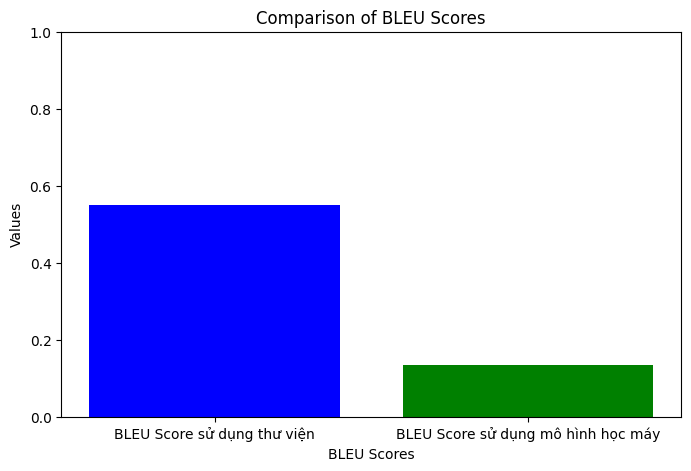

In [30]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ so sánh điểm BLEU
labels = ['BLEU Score sử dụng thư viện', 'BLEU Score sử dụng mô hình học máy']
scores = [bleu_score1, bleu_score]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('BLEU Scores')
plt.ylabel('Values')
plt.title('Comparison of BLEU Scores')
plt.ylim(0, 1)  # BLEU score nằm trong khoảng từ 0 đến 1
plt.show()